In [1]:
from funcoesTermosol import *
import numpy as np
import math

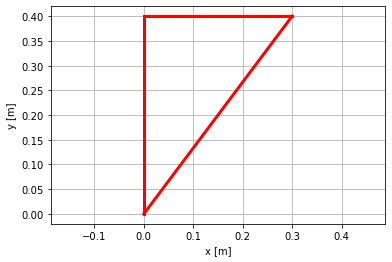

In [194]:
input_data = "entrada.xlsx"
[nn,N,nm,Inc,nc,F,nr,R] = importa(input_data)
plota(N, Inc)

In [202]:
# Comprimento do Membro (m)
L = 1
A = 2e-4
E = 210e9

In [203]:
def vet_conec(ne):
  conec_array = np.array(nn*[0])
  n1 = int(Inc[ne, 0])
  n2 = int(Inc[ne, 1])
  conec_array[n1 - 1] = -1
  conec_array[n2 - 1] = 1
  return conec_array

def mat_conec():
  mat = []
  for i in range(nm):
    mat.append(vet_conec(i))
  return np.array(mat)

C = mat_conec()
C_Transposto = C.T
print(f'Matriz de Conectividade:\n\n {C}')
print("____________________________________")
print(" ")
print(f'Matriz de Conectividade Transposta:\n\n {C_Transposto}')

Matriz de Conectividade:

 [[-1  1  0]
 [ 0 -1  1]
 [ 1  0 -1]]
____________________________________
 
Matriz de Conectividade Transposta:

 [[-1  0  1]
 [ 1 -1  0]
 [ 0  1 -1]]


In [204]:
M = np.matmul(N, C_Transposto)
print(f'Matriz dos Membros:\n\n {M}')

Matriz dos Membros:

 [[ 0.   0.3 -0.3]
 [ 0.4  0.  -0.4]]


In [205]:
def calc_Se(m_e, l):
  S_e = (E*A/l)*(np.matmul(m_e.T, m_e)/(np.linalg.norm(m_e))**2)
  if (np.linalg.norm(m_e))**2 == 0:
    S_e = np.zeros((2, 2))
  return S_e

def calc_Ke(c_e, S_e):
  mul_C = np.matmul(c_e.T, c_e)
  K_e = (np.kron(mul_C, S_e))
  return K_e

def calc_l(element):
  x1 = N[0][int(Inc[:,0][element]) - 1]
  x2 = N[0][int(Inc[:, 1][element]) - 1]
  y1 = N[1][int(Inc[:, 0][element]) - 1]
  y2 = N[1][int(Inc[:, 1][element]) - 1]
  l = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
  return l

In [258]:
shape_Kg = 2*nn
K_g = np.zeros((shape_Kg, shape_Kg))

for element in range(0, nm):
    
  m_e = (M[:, element])[np.newaxis]
  
  m_e_transposed = m_e.T
    
  c_e = (C[element, :])[np.newaxis]
  c_e_transposed = c_e.T
  
  S_e = calc_Se(m_e, calc_l(element))
  print(f'Matriz S{element+1}:\n {S_e}')
  print("__________________")
  
  K_e = calc_Ke(c_e, S_e)
  print(f'Matriz K{element+1}:\n {K_e}')
  print("__________________")
  
  K_g += K_e
  print(" ")

print(f'Matriz K_g:\n {K_g}')
print("__________________")

Matriz S1:
 [[0.00e+00 0.00e+00]
 [0.00e+00 1.05e+08]]
__________________
Matriz K1:
 [[ 0.00e+00  0.00e+00 -0.00e+00 -0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  1.05e+08 -0.00e+00 -1.05e+08  0.00e+00  0.00e+00]
 [-0.00e+00 -0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [-0.00e+00 -1.05e+08  0.00e+00  1.05e+08  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00]]
__________________
 
Matriz S2:
 [[1.4e+08 0.0e+00]
 [0.0e+00 0.0e+00]]
__________________
Matriz K2:
 [[ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00  0.0e+00]
 [ 0.0e+00  0.0e+00  1.4e+08  0.0e+00 -1.4e+08 -0.0e+00]
 [ 0.0e+00  0.0e+00  0.0e+00  0.0e+00 -0.0e+00 -0.0e+00]
 [ 0.0e+00  0.0e+00 -1.4e+08 -0.0e+00  1.4e+08  0.0e+00]
 [ 0.0e+00  0.0e+00 -0.0e+00 -0.0e+00  0.0e+00  0.0e+00]]
__________________
 
Matriz S3:
 [[30240000.         40320000.        ]
 [40320000.      

In [268]:
def desloc_nodais(K_g, F):
  u = np.linalg.solve(K_g, F)
  return u

def cond_contorno(Kg):
  try:
    K_g = np.delete(Kg, R.astype(int), 0)
    K_g_new = np.delete(K_g, R.astype(int), 1)
    F_new = np.delete(F, R.astype(int), 0)
  except ValueError:
      print( "Not Defined")
  return K_g_new, F_new

K_g_new, F_new = cond_contorno(K_g)
u = desloc_nodais(K_g_new, F_new)
print(u)

[[-9.52380952e-07]
 [ 1.60714286e-06]
 [-4.01785714e-06]]


In [283]:
def complete_u(u, R): 
    U_SIZE = u.shape[0] + R.shape[0]
    u_ = np.zeros((U_SIZE, 1))
    
    li = []
    for i in range(0, U_SIZE):
        if i not in R.astype(int):
            li.append(i)
            
    for i in range(0, u.shape[0]):
        u_[li[i]] = u[i]
        
    return u_

u_ = complete_u(u, R)
print(f'Matriz de Deslocamento Nodal:\n {u_}')
print("__________________")

Matriz de Deslocamento Nodal:
 [[ 0.00000000e+00]
 [-9.52380952e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.60714286e-06]
 [-4.01785714e-06]]
__________________


In [294]:
def reac_apoio(K, u):
    f = np.matmul(K, u)
    f_new = np.delete(f, li)
    return f_new

support_reaction = reac_apoio(Kg, u_)
p = support_reaction.reshape((support_reaction.shape[0],1))
print(f'Matriz das Reações de Apoio:\n {p}')
print("__________________")

Matriz das Reações de Apoio:
 [[  75.]
 [-225.]
 [ 100.]]
__________________


In [295]:
def sin_cos(x2, x1, y2, y1, l):
  s = (y2 - y1)/l
  c = (x2 - x1)/l
  return s, c

def calc_deform_esp_G(c, s, mat_u):
  return (1/L)* np.matmul([-c, -s, c, s], mat_u)

def calc_tensao_interna(c, s, mat_u):
  return (E/L)*np.matmul([-c, -s, c, s], mat_u)

deform_matriz = np.zeros((nm,1))
tensao_matriz = np.zeros((nm,1))
forca_matriz = np.zeros((nm,1))

for i in range(0,nm):
    
    # Matriz u (deslocamento nodal) do Elemento
    mat_u = [
            u_[(int(Inc[i, 0])-1)*2], 
            u_[(int(Inc[i, 0])-1)*2 +1], 
            u_[(int(Inc[i, 1])-1)*2], 
            u_[int(Inc[i, 1]-1)*2 +1]
    ]
    
    E = Inc[i, 2]
    A = Inc[i, 3]
    
    x1 = N[0][int(Inc[:,0][i])-1]
    y1 = N[1][int(Inc[:,0][i])-1]
    x2 = N[0][int(Inc[:,1][i])-1]
    y2 = N[1][int(Inc[:,1][i])-1]
    
    l = math.sqrt(((x1-x2)**2+(y1-y2)**2))
    
    s,c = sin_cos(x2, x1, y2, y1, l)
  
    deform = calc_deform_esp_G(c, s, mat_u)
    tensao = calc_tensao_interna(c, s, mat_u)
    forca = tensao*A
    
    deform_matriz[i] = deform
    tensao_matriz[i] = tensao
    forca_matriz[i] = forca


In [190]:
print(tensao_matriz)

[[-3.15489899e+08]
 [ 1.11369318e+08]
 [ 3.15489899e+08]
 [ 8.75000000e+07]
 [ 3.35875721e+07]
 [-3.50489899e+08]
 [ 4.35342712e+08]
 [ 3.50489899e+08]
 [-3.35875721e+07]
 [-5.25000000e+07]
 [ 2.58336309e+08]
 [-3.55489899e+08]
 [-1.32352814e+08]]
